# confusion matrix

a quick way to compare the labels predicted and the label is was supposed to predict. <br>
Useful to know <u>where the model is getting confused</u>

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
iris = load_iris()

In [21]:
column_names = ['sepal length', 'sepal width', 'petal length', 'petal width']
iris_df = pd.DataFrame(iris.data, columns = column_names)
iris_df['target'] = iris['target']
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X = iris_df.drop('target', axis = 1)
y = iris_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .15)

clf = SVC()
clf.fit(X_train, y_train)

y_preds = clf.predict(X_test)

In [11]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_preds)
conf_mat

array([[8, 0, 0],
       [0, 7, 0],
       [0, 1, 7]], dtype=int64)

In [12]:
# visualizing confusion matrix with pd.crosstab()
pd.crosstab(y_test,
            y_preds,
            rownames = ['actual labels'],
            colnames = ['predicted labels'])

predicted labels,0,1,2
actual labels,,,
0,8,0,0
1,0,7,0
2,0,1,7


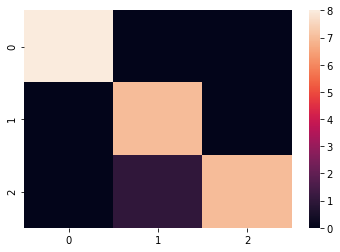

In [13]:
# using seaborn to visualize the confusion matrix
import seaborn as sns

# create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# plot it using seaborn
sns.heatmap(conf_mat);

In [14]:
len(y_test), len(y_preds)

(23, 23)

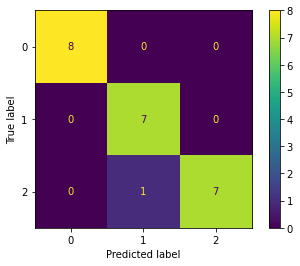

In [17]:
from sklearn.metrics import plot_confusion_matrix
# plot_confusion_matrix(clf, X_test, y_test) 
plot_confusion_matrix(clf, X_test, y_test);
# very ugly

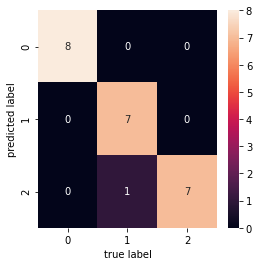

In [19]:
import matplotlib.pyplot as plt
def plot_conf_mat(conf_mat):
    """
    plots a confusin matrix using seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(4,4))
    ax = sns.heatmap(conf_mat,
                     annot = True,
                     cbar = True)
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.show()
    
plot_conf_mat(conf_mat)

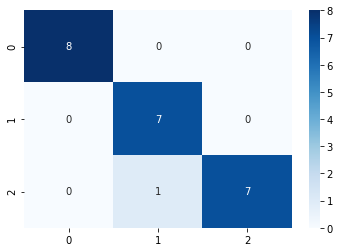

In [28]:
import seaborn as sns
sns.heatmap(conf_mat, annot = True, cmap = 'Blues');

In [ ]:
conf_mat